In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [58]:
test = pd.read_csv(r"C:\Machine-Learning--Projects-master (3)\Machine-Learning--Projects-master\Projects\Projects for Submission\Project 2 - Income Qualification\Dataset for the project\Dataset for the project\test.csv", index_col = 0)
train = pd.read_csv(r"C:\Machine-Learning--Projects-master (3)\Machine-Learning--Projects-master\Projects\Projects for Submission\Project 2 - Income Qualification\Dataset for the project\Dataset for the project\train.csv", index_col = 0)

In [6]:
#Let us explore our dataset before moving further

In [59]:
test.shape

(23856, 141)

In [60]:
train.shape

(9557, 142)

In [61]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [62]:
test.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Id,,,,,,,,,,,,,,,,,,,,,
ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [65]:
# Check the categorical columns in Train 
train.describe(include = 'object') 

,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557
unique,2988,31,22,22
top,fd8a6d014,yes,no,no
freq,13,2192,3762,6230


In [67]:
# Check the categorical columns in Test

In [68]:
test.describe(include = 'object')

,idhogar,dependency,edjefe,edjefa
count,23856,23856,23856,23856
unique,7352,35,22,22
top,8e9159699,yes,no,no
freq,13,5388,9056,15845


In [70]:
# We need to do the preprocessing for these 4 categorical columns first.

In [71]:
train.idhogar.unique() #(identify as house id)

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
Name: dependency, dtype: int64

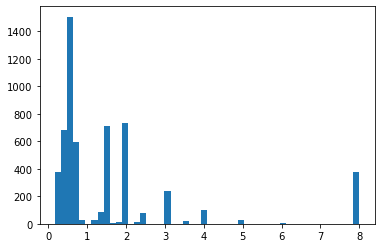

In [77]:
#Preprocessing for dependency columns
data = train.dependency
plt.hist(data[data.isin(['no', 'yes'])== False ].astype('float'), bins = 50)
plt.show

data.value_counts().head(10)

In [78]:
# Decision: no=0, yes=.5, then convert all to float.
train.dependency = train.dependency.replace('no',0).replace('yes',0.5).astype('float')
test.dependency = test.dependency.replace('no',0).replace('yes',0.5).astype('float')

0.500000    3689
0.000000    1747
2.000000     730
1.500000     713
0.333333     598
0.666667     487
8.000000     378
0.250000     260
3.000000     236
4.000000     100
Name: dependency, dtype: int64

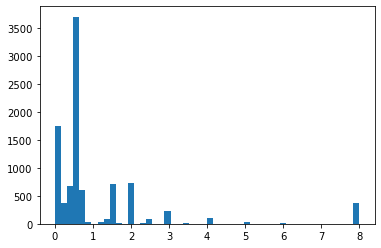

In [80]:
data = train.dependency
plt.hist(data[data.isin(['no', 'yes'])== False ].astype('float'), bins = 50)
plt.show

data.value_counts().head(10)

no    3762
6     1845
11     751
9      486
3      307
15     285
8      257
7      234
5      222
14     208
Name: edjefe, dtype: int64

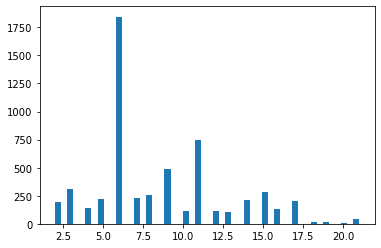

In [81]:
# Preprocessing for edjefe[male years of education] columns:
data = train.edjefe
plt.hist(data[data.isin(['no', 'yes'])== False ].astype('float'), bins = 50)
plt.show

data.value_counts().head(10)

In [82]:
# Decision: no=0, yes=median, then convert all to float.
med = np.median(train.edjefe[train.edjefe.isin(['no','yes'])==False].astype('float')) #find median values by excluding yes,no.
train.edjefe = train.edjefe.replace('no',0).replace('yes',med).astype('float')
test.edjefe = test.edjefe.replace('no',0).replace('yes',med).astype('float')

0.0     3762
6.0     1845
11.0     751
9.0      486
7.0      357
3.0      307
15.0     285
8.0      257
5.0      222
14.0     208
Name: edjefe, dtype: int64

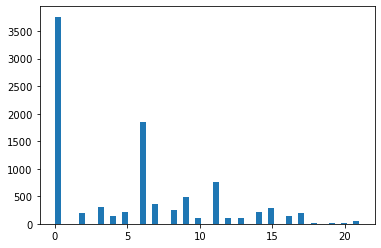

In [83]:
data = train.edjefe
plt.hist(data[data.isin(['no', 'yes'])== False ].astype('float'), bins = 50)
plt.show

data.value_counts().head(10)

no    6230
6      947
11     399
9      237
8      217
15     188
7      179
5      176
3      152
4      136
Name: edjefa, dtype: int64

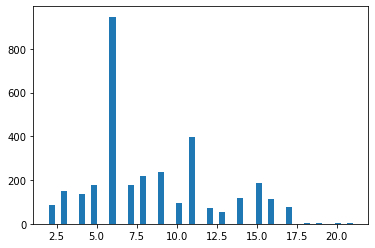

In [84]:
# Preprocessing for edjefa[female years of education] columns:
data = train.edjefa
plt.hist(data[data.isin(['no', 'yes'])== False ].astype('float'), bins = 50)
plt.show

data.value_counts().head(10)

In [85]:
# Decision: no=0, yes=median, then convert all to float.
med = np.median(train.edjefa[train.edjefa.isin(['no','yes'])==False].astype('float')) #find median values by excluding yes,no.
train.edjefa = train.edjefa.replace('no',0).replace('yes',med).astype('float')
test.edjefa = test.edjefa.replace('no',0).replace('yes',med).astype('float')

0.0     6230
6.0      947
11.0     399
7.0      248
9.0      237
8.0      217
15.0     188
5.0      176
3.0      152
4.0      136
Name: edjefa, dtype: int64

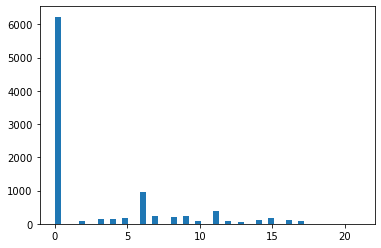

In [86]:
data = train.edjefa
plt.hist(data[data.isin(['no', 'yes'])== False ].astype('float'), bins = 50)
plt.show

data.value_counts().head(10)

In [87]:
# Checking the missing values
train.isnull().sum()

v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 142, dtype: int64

In [88]:
test.isnull().sum()

v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
v14a                   0
                   ...  
SQBhogar_nin           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Length: 141, dtype: int64

In [89]:
#check the above columns null percentage in train data so we can decide to drop or computation:
print('In train_v2a1 columns has null values: ', (train['v2a1'].isnull().sum()/train.shape[0] *100))
print('In train_v18q1 columns has null values: ', (train['v18q1'].isnull().sum()/train.shape[0] *100))
print('In train_rez_esc columns has null values: ', (train['rez_esc'].isnull().sum()/train.shape[0] *100))

In train_v2a1 columns has null values:  71.7798472323951
In train_v18q1 columns has null values:  76.82327090091033
In train_rez_esc columns has null values:  82.95490216595167


In [90]:
#Check for test data.
print('In test_v2a1 columns has null values: ', (test['v2a1'].isnull().sum()/test.shape[0] *100))
print('In test_v18q1 columns has null values: ', (test['v18q1'].isnull().sum()/test.shape[0] *100))
print('In test_rez_esc columns has null values: ', (test['rez_esc'].isnull().sum()/test.shape[0] *100))

In test_v2a1 columns has null values:  72.95020120724345
In test_v18q1 columns has null values:  75.98088531187123
In test_rez_esc columns has null values:  82.3817907444668


In [91]:
#Better we should drop these columns:
train.drop(columns = ['v2a1', 'v18q1', 'rez_esc'], inplace=True)
test.drop(columns = ['v2a1', 'v18q1', 'rez_esc'], inplace=True)

In [92]:
train.shape, test.shape

((9557, 139), (23856, 138))

In [93]:
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

meaneduc     5
SQBmeaned    5
dtype: int64

In [94]:
#Check for test data as well
null_columns = test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

meaneduc     31
SQBmeaned    31
dtype: int64

In [95]:
#We would go for computation:
# Impute meaneduc and SQBmeaned
from sklearn.impute import SimpleImputer
SimpleImputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
SimpleImputer.fit(train[['meaneduc','SQBmeaned']])
train[['meaneduc','SQBmeaned']] = SimpleImputer.transform(train[['meaneduc','SQBmeaned']])
test[['meaneduc','SQBmeaned']] = SimpleImputer.transform(test[['meaneduc','SQBmeaned']])

In [96]:
#Check is there any null values in train and test:
print('null values in train', train.isnull().any().sum())
print('null values in test', test.isnull().any().sum())

null values in train 0
null values in test 0


In [ ]:
#Now data is clean and we ready to go further.